In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6324576819468950453
xla_global_id: -1
]


In [3]:
import re
import torch
import pandas as pd

device= torch.device('cuda:0'
                     if torch.cuda.is_available()
                     else 'cpu')
print("device: ", device)

device:  cpu


In [60]:
df=pd.read_excel(r"C:\Users\user\xfilter\X_filter\알고리즘\욕 데이터\Sentence data.xlsx")

str_data = df['Sentence'].astype(str).tolist()

# 'Sentence' 칼럼의 값을 하나의 문자열로 결합
all_sentences = ' '.join(str_data)

print(df.shape)
df.head()

(28807, 2)


,Sentence,label
0,좌배 까는건 ㅇㅂ,1
1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ,0
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,세탁이라고 봐도 된다,0
4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1


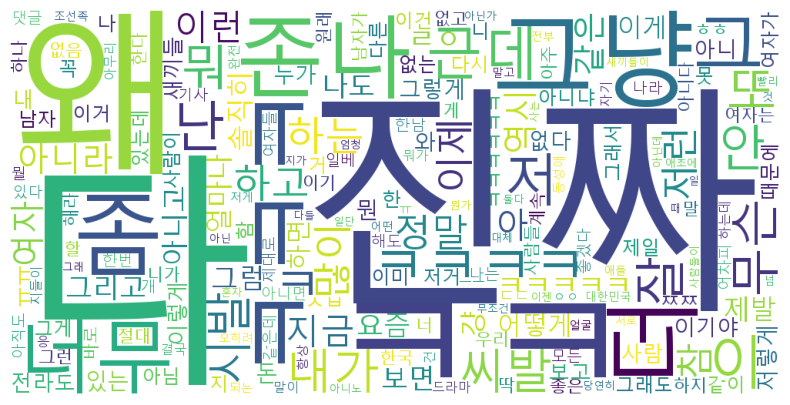

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# WordCloud 객체 생성
wordcloud = WordCloud(width=1000, 
                      height=500, 
                      background_color='white', 
                      font_path=r"C:\Windows\Fonts\malgun.ttf")

wordcloud.generate(all_sentences)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # x와 y축 레이블 숨기기
plt.show()


In [65]:
null_idx=df[df.label.isnull()].index
df.loc[null_idx,"Sentence"]

df.loc[null_idx,"label"]=df.loc[null_idx,"Sentence"].apply(lambda x:x[-1])
df.loc[null_idx,"Sentence"]=df.loc[null_idx,"Sentence"].apply(lambda x: x[-2])

In [67]:
train_data=df.sample(frac=0.8,random_state=42)
test_data=df.drop(train_data.index)
print('중복 제거 전 학습 데이터셋 : {}'.format(len(train_data)))
print('중복 제거 전 테스트 데이터셋 : {}'.format(len(test_data)))

train_data.drop_duplicates(subset=["Sentence"],inplace=True)
test_data.drop_duplicates(subset=["Sentence"],inplace=True)
print('중복 제거 후 학습 데이터셋 : {}'.format(len(train_data)))
print('중복 제거 후 테스트 데이터셋 : {}'.format(len(test_data)))


중복 제거 전 학습 데이터셋 : 23046
중복 제거 전 테스트 데이터셋 : 5761
중복 제거 후 학습 데이터셋 : 23042
중복 제거 후 테스트 데이터셋 : 5761


In [69]:
from transformers import ElectraTokenizer,ElectraForSequenceClassification,TFElectraForSequenceClassification,AutoTokenizer,AutoModelForSequenceClassification,TrainingArguments,Trainer
import torch
model_name="beomi/KcELECTRA-base"
tokenizer=AutoTokenizer.from_pretrained(model_name)

c:\Users\user\anaconda3\envs\conda38\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [70]:
tokenized_train_sentences=tokenizer(
    list(train_data["Sentence"]),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

In [71]:
tokenized_test_sentences=tokenizer(
    list(test_data["Sentence"]),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

In [72]:
print(tokenized_train_sentences[0])
print(tokenized_train_sentences[0].tokens)
print(tokenized_train_sentences[0].ids)

Encoding(num_tokens=128, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['Ġê³ł', 'ìĻķ', 'ë¦ī', 'ëĶĶ', 'ìĭľê³ł', 'ìłķ', 'ëĭī', '=', 'ìķ¼', 'ìĿ´', 'ê°Ļ', 'ìŀ', '©', 'ìĿĢ', 'ìĹĺ', 'ë¦¬íĬ¸', 'ìĥĪëģ¼ëĵ¤ìķĦ', '!', '=', '!', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [73]:
class CurseDataset(torch.utils.data.Dataset):
    def __init__(self, encoding, labels):
        self.encoding=encoding
        self.labels=labels
        
    def __getitem__(self,idx):
        item={key:torch.tensor(val[idx])
              for key,val in self.encoding.items()}
        item["labels"]=torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [77]:
train_label=train_data["label"].values
test_label=test_data["label"].values

train_dataset=CurseDataset(tokenized_train_sentences,train_label)
test_dataset=CurseDataset(tokenized_test_sentences,test_label)


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=3)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [78]:
model=AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=3)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L